#### Problem of the statement

# To determine the salary level for a managerial position

In [126]:
#importing the relevant liraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeClassifier         
from sklearn.model_selection import train_test_split   
from sklearn.metrics import r2_score   
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

In [127]:
# loading the Position salaries onto the notebook. 
position_salaries = pd.read_csv(r'/home/jeromemugita/Documents/Code/DataScience/Intermediate DS/Project/Position_Salaries.csv')
position_salaries.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [128]:
# The data in the dataset is simple, an overview shows that in order to come up with a model that correctly predicts a managerial position 
# based on the position level and the salary. 
# We can also see that there is little we can learn about the relationship among the entries by just looking at it. 
# This calls for a bit of explanatory data analysis. 

In [129]:
#first we copy the dataset to ensure we have a backup incase of any loss or damage on the  data.
df = position_salaries.copy()
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [130]:
# Then we can find the summary statistics on our data which also does not tell us alot. 
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [131]:
# we check the shape of the dataset and find that there are 3 rows and 10 columns which could also tell us 
# that our dataset is small. An advantage is that we can clearly tell that there are no missing values. 
df.shape

(10, 3)

In [132]:
# we can then find the correlation among our numerical colums, level and salary. We can tell that there is a high correlation
# between the salary and position level. We may even go further to state that salary could vary as the positions advance. 
# This is a good finding since it sheds light on the distribution of our data. 

df[['Level', 'Salary']].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


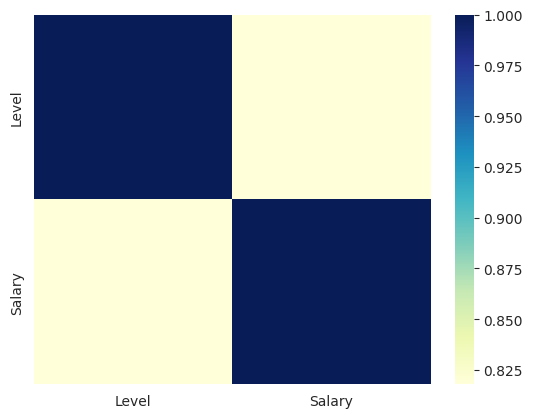

In [133]:
# The correlation matrix plot shows that there is a positive correlation among data points showing that lower level jobs pay less than 
# higher level jobs indicated by the shifting white to blue colums on the left side. 

sns.heatmap(df[['Level', 'Salary']].corr(), cmap='YlGnBu')
plt.show()

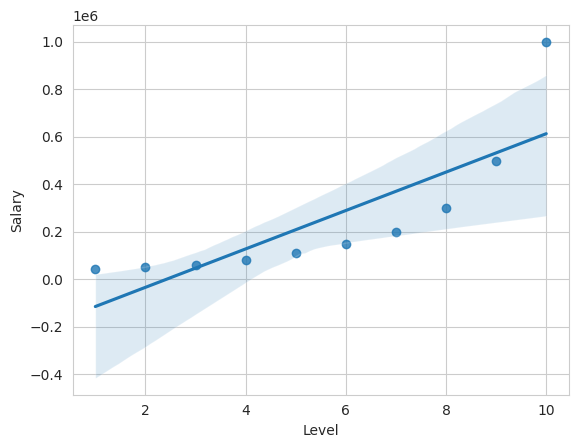

In [134]:
# At this point a visual representation of our data could shed more light on its nature. 
 
# The regression line indicates the linerarity in our data and thus leads us to the conclusion that position level is directly proporational 
# to salary. 


sns.set_style('whitegrid')

sns.regplot(df, x='Level', y='Salary')
plt.show()

In [158]:
# As at this point we have enough information to use for selecting the appropriate model to use for making predictions
# for salary amount per managerial position. The models are selected with regard to the linearity and potential
# classified outcomes. The models are: 

# 1. Linear Regression
# 2. Multiple Regression
# 3. Decision Tree
# 4. Polynormial Regression
# 5. Random Forest: Regressor

### Linear Regression

In [136]:
# first we define our regression model
slope, intercept, r, p, std_err = stats.linregress(df['Level'], df['Salary'])

# then we create a function that accepts salary as an argument to use as the independent
# variable in the analysis

def predictPosition(level):
    return slope * level + intercept

# we make a predition for the position level for a specfic salary amount say 95000

salary = predictPosition(4.7)
print(salary)

# Our model predicts 184796 to be the salary for a position 4.7 managerial position which is not
# very accurate

184796.96969696973


In [137]:
# The linear regression model above provides us with valuable insights but it 
# doesn't help us evaluate the salary for a managerial position fully. 

### Multiple Regression

In [138]:
# I want to use the multiple regression to determine the managerial position 
# based on the salary and position level. Therefore, I would like to create 
# a fully numerical dataset to use for the following analysis. 

def replace_positions_with_numbers(df): 
    positions = df['Position'].unique()
    position_map = {pos: index + 1 for index, pos in enumerate(positions)}
    
    df['Position'] = df['Position'].map(position_map)
    return df

replace_positions_with_numbers(df)


,Position,Level,Salary
0,1,1,45000
1,2,2,50000
2,3,3,60000
3,4,4,80000
4,5,5,110000
5,6,6,150000
6,7,7,200000
7,8,8,300000
8,9,9,500000
9,10,10,1000000


In [139]:
# Now that we have numerical values we can select the independent and 
# dependent variables 

X = df[['Position', 'Level']]

y = df['Salary']

print(X.shape)
print(y.shape)

(10, 2)
(10,)


In [140]:
# we create a linear regression model using Linear Regression from skit learn

linear_regressor = linear_model.LinearRegression()

In [141]:
# we then fit the model with out dependent and independent variables
# to fill the regression object. 

linear_regressor.fit(X, y)

LinearRegression()

In [159]:
# We can now use our model to attempt a prediction for position based 
# level and salary. 

# Say we want to find a position 5 (Regional manager) and level 6.4, what salary will this employee receive?

salary = linear_regressor.predict([[5, 5]])

print(salary)

# we see from our results that our model gives a salary of 209060 which 
# translates to "Planner". This is far from the expected result rendering this method unreliable 

[209060.60606061]


/home/jeromemugita/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Decision Tree

In [143]:
# We want to classify different employees still based on salary and level 
# the decision tree is a good classifier so we'll use it here:

X = df[['Level', 'Position']]

y = df['Salary']

# First we split the data into training and testing data and initialize the 
# test size as 0.2 (80% training and 20% testing) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# then we create the decision tree classifier object

salary_decision = DecisionTreeClassifier()

# then we fit our data onto the object. 

decision = salary_decision.fit(X_train, y_train)
decision

DecisionTreeClassifier()

In [144]:
# Then we make the prediction and store it on the variable y_pred
y_pred = decision.predict(X_test)

In [145]:
# here we check for our models accuracy to determine the viability 

r2 = r2_score(y_test, y_pred)
print(r2)

# this model registers an r2 score of 59% and is therefore unsuitable
# for making any predictions. 

0.5857438016528926


In [146]:
# should we choose to use it for predictions for a position 5 employee of level 5
# we find. 

income = salary_decision.predict([[5, 5]])
print(income)

# We find that our model predicts a salary of 110000 for a Regional manager 
# position

[110000]


/home/jeromemugita/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Polynormial Regression

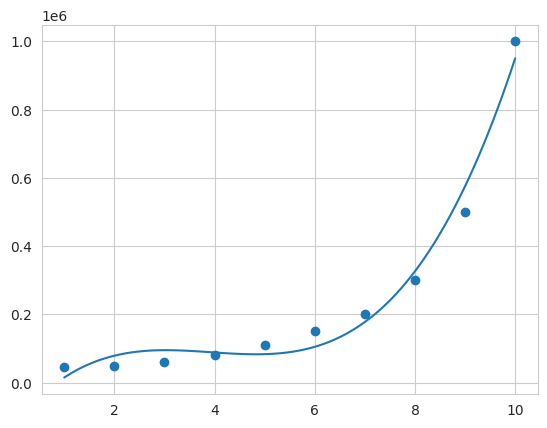

In [147]:
# first we get the features we'd like to use; for now we want to predict the
# salary given the employee level

x = df['Level']
y = df['Salary']

# we define the model and fit our object 

model = np.poly1d(np.polyfit(x, y, 3))

# we model the line and pass our data limits and the number of samples
line = np.linspace(1, 10, 100)

# we plot the scatter plot and fit our line to get the polynormial line of 
# best fit. 

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()


In [160]:
# we find the r2 score to determine the model accuracy
print(r2_score(y, model(x)))

# the result is 98% which is near perfect, rendering this model the most reliable

0.9812097727913367


In [161]:
#  when we use the model to find a regional manager job, it returns the salary as 83270 which is not far from the actual salary. 
salary = model(5)
print(salary)

83270.39627039702


In [150]:
# It would seem that classification solutions do not favor this type 
# of data structure. Therefore. I will settle on the last one on the list
# the Random Forest regressor

### Random Forest regressor

In [151]:
# First we select our features for the dependent and independent 
# variables. 

X = df[['Level', 'Position']].values

y = df['Salary'].values


In [152]:
# then we define the regressor and assign it value regressor 

regressor = DecisionTreeRegressor()

# then we split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [153]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [154]:
y_predict = regressor.predict(X_test)

In [155]:
r2 = r2_score(y_test, y_predict)
print(r2)

# a r score of 0.59 indicates a near perfect fit which means our
# model is dependable. 

0.5857438016528926


In [156]:
position_salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [157]:
# When we make the predition for a level 5 employee of position 5 (regional manager)
# we get a salary of 110000 for a Regional manager. 

position = regressor.predict([[5, 5]])
print(position)

[110000.]


### The linearity in data indicates that a linear regression models should correctly predict the expected outcome. I chose the decision tree to serve as control for the analysis. It turned out that the model did not fit well with our data; this models could be best suitable for making predictions on categorical data or descrete classes. The four regression variations however produced favourable results. I could argue that the linearity in the data displayed in the regression plot above contributes to this finding or instead that the data is numerical and continuous. 

### In conclusion, the polynormial regression is the preferred model for selecting the salary, it returns the best test score indicating the reliablity of the model. Moreover, it is able to present the accurate salary for the chosen position and level. 